In [2]:
#!/usr/bin/env python3

# add the path to the folder above, hardcoded
import sys
pathhere = "/home/luke/mujoco-devel/rl/"
sys.path.insert(0, pathhere)

from env.MjEnv import MjEnv
import numpy as np
from matplotlib import pyplot as plt
import pickle

# increase matplotlib resolution
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [3]:
# get the test data
testdatapath = "/home/luke/gripper-ros/test_data/palm_vs_no_palm"
test_names = "{0}_E{1}_{2}_YCB"
palms = ["no_palm", "palm"]
stiffnesses = [1, 2, 3]
fingers = [45, 60, 75, 90]

# create modelsaver instance
from ModelSaver import ModelSaver
directory = ""#"pb4_tests_apr23" # ""
saver = ModelSaver(testdatapath)

# get test data class
pathtestclass = "/home/luke/gripper-ros/src/rl/gripper_dqn/scripts/"
sys.path.insert(0, pathtestclass)
from grasp_test_data import GraspTestData, set_palm_frc_threshold, set_X_frc_threshold, set_Y_frc_threshold
data_explorer = GraspTestData()
set_palm_frc_threshold(10.0)
set_X_frc_threshold(10.0)
set_Y_frc_threshold(10.0)

In [4]:
# load the results from all of the tests
results = [
  [
    [
      [] for f in range(len(fingers))
    ] for s in range(len(stiffnesses))
  ] for p in range(len(palms))
]

for i in range(len(palms)):
  for j in range(len(stiffnesses)):
    for k in range(len(fingers)):

      # load this test data
      saver.enter_folder(test_names.format(palms[i], stiffnesses[j], fingers[k]))
      testdata = saver.load(id=None, filenamestarts="test_data", suffix_numbering=True)
      results[i][j][k] = data_explorer.get_test_results(data=testdata)
      saver.exit_folder()

Loading file /home/luke/gripper-ros/test_data/palm_vs_no_palm/no_palm_E1_45_YCB/test_data_007.lz4 with pickle ... finished
Loading file /home/luke/gripper-ros/test_data/palm_vs_no_palm/no_palm_E1_60_YCB/test_data_006.lz4 with pickle ... finished
Loading file /home/luke/gripper-ros/test_data/palm_vs_no_palm/no_palm_E1_75_YCB/test_data_005.lz4 with pickle ... finished
Loading file /home/luke/gripper-ros/test_data/palm_vs_no_palm/no_palm_E1_90_YCB/test_data_007.lz4 with pickle ... finished
Loading file /home/luke/gripper-ros/test_data/palm_vs_no_palm/no_palm_E2_45_YCB/test_data_005.lz4 with pickle ... finished
Loading file /home/luke/gripper-ros/test_data/palm_vs_no_palm/no_palm_E2_60_YCB/test_data_003.lz4 with pickle ... finished
Loading file /home/luke/gripper-ros/test_data/palm_vs_no_palm/no_palm_E2_75_YCB/test_data_006.lz4 with pickle ... finished
Loading file /home/luke/gripper-ros/test_data/palm_vs_no_palm/no_palm_E2_90_YCB/test_data_009.lz4 with pickle ... finished
Loading file /ho

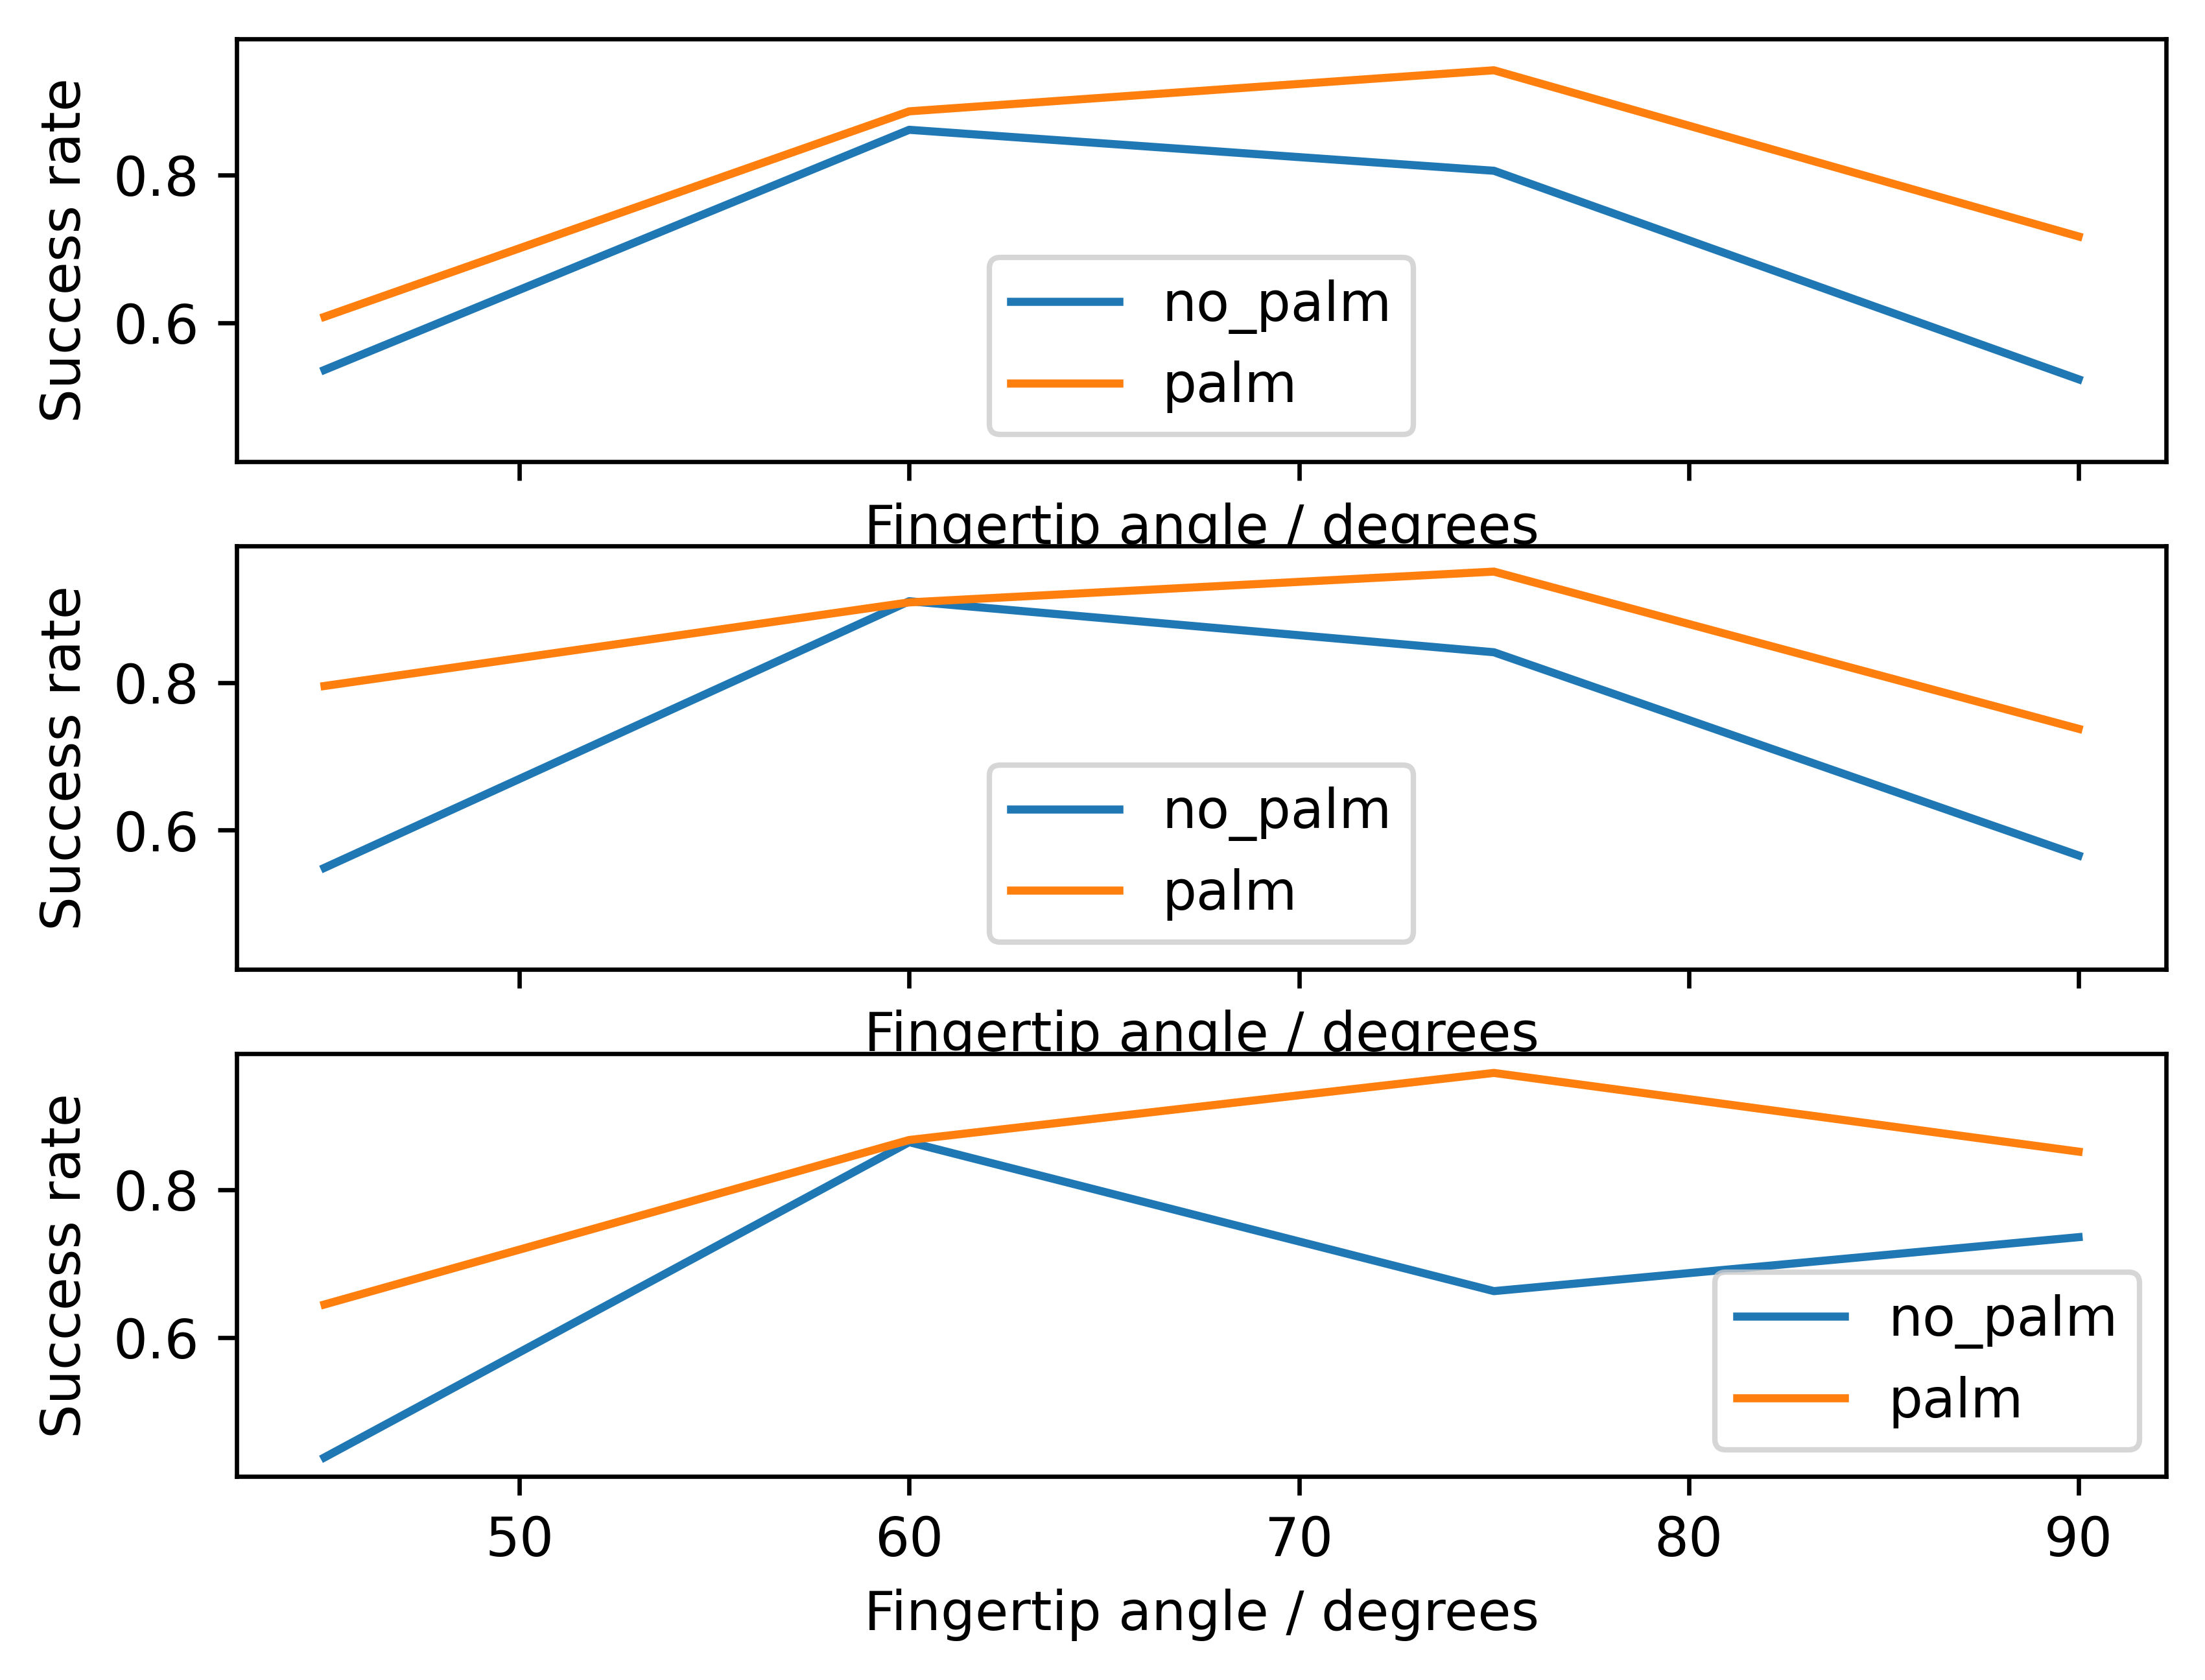

In [5]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)

for j in range(len(stiffnesses)):
  # for k in range(len(fingers)):
    for i in range(len(palms)):

      # plot success rate
      x = [45, 60, 75, 90]
      y = [
        results[i][j][0].avg_SR_per_obj,
        results[i][j][1].avg_SR_per_obj,
        results[i][j][2].avg_SR_per_obj,
        results[i][j][3].avg_SR_per_obj,
      ]

      axs[j].plot(x, y, label=palms[i])
      axs[j].legend()
      axs[j].set(xlabel="Fingertip angle / degrees")
      axs[j].set(ylabel="Success rate")

# fig.set_size_inches(3.5, 7)

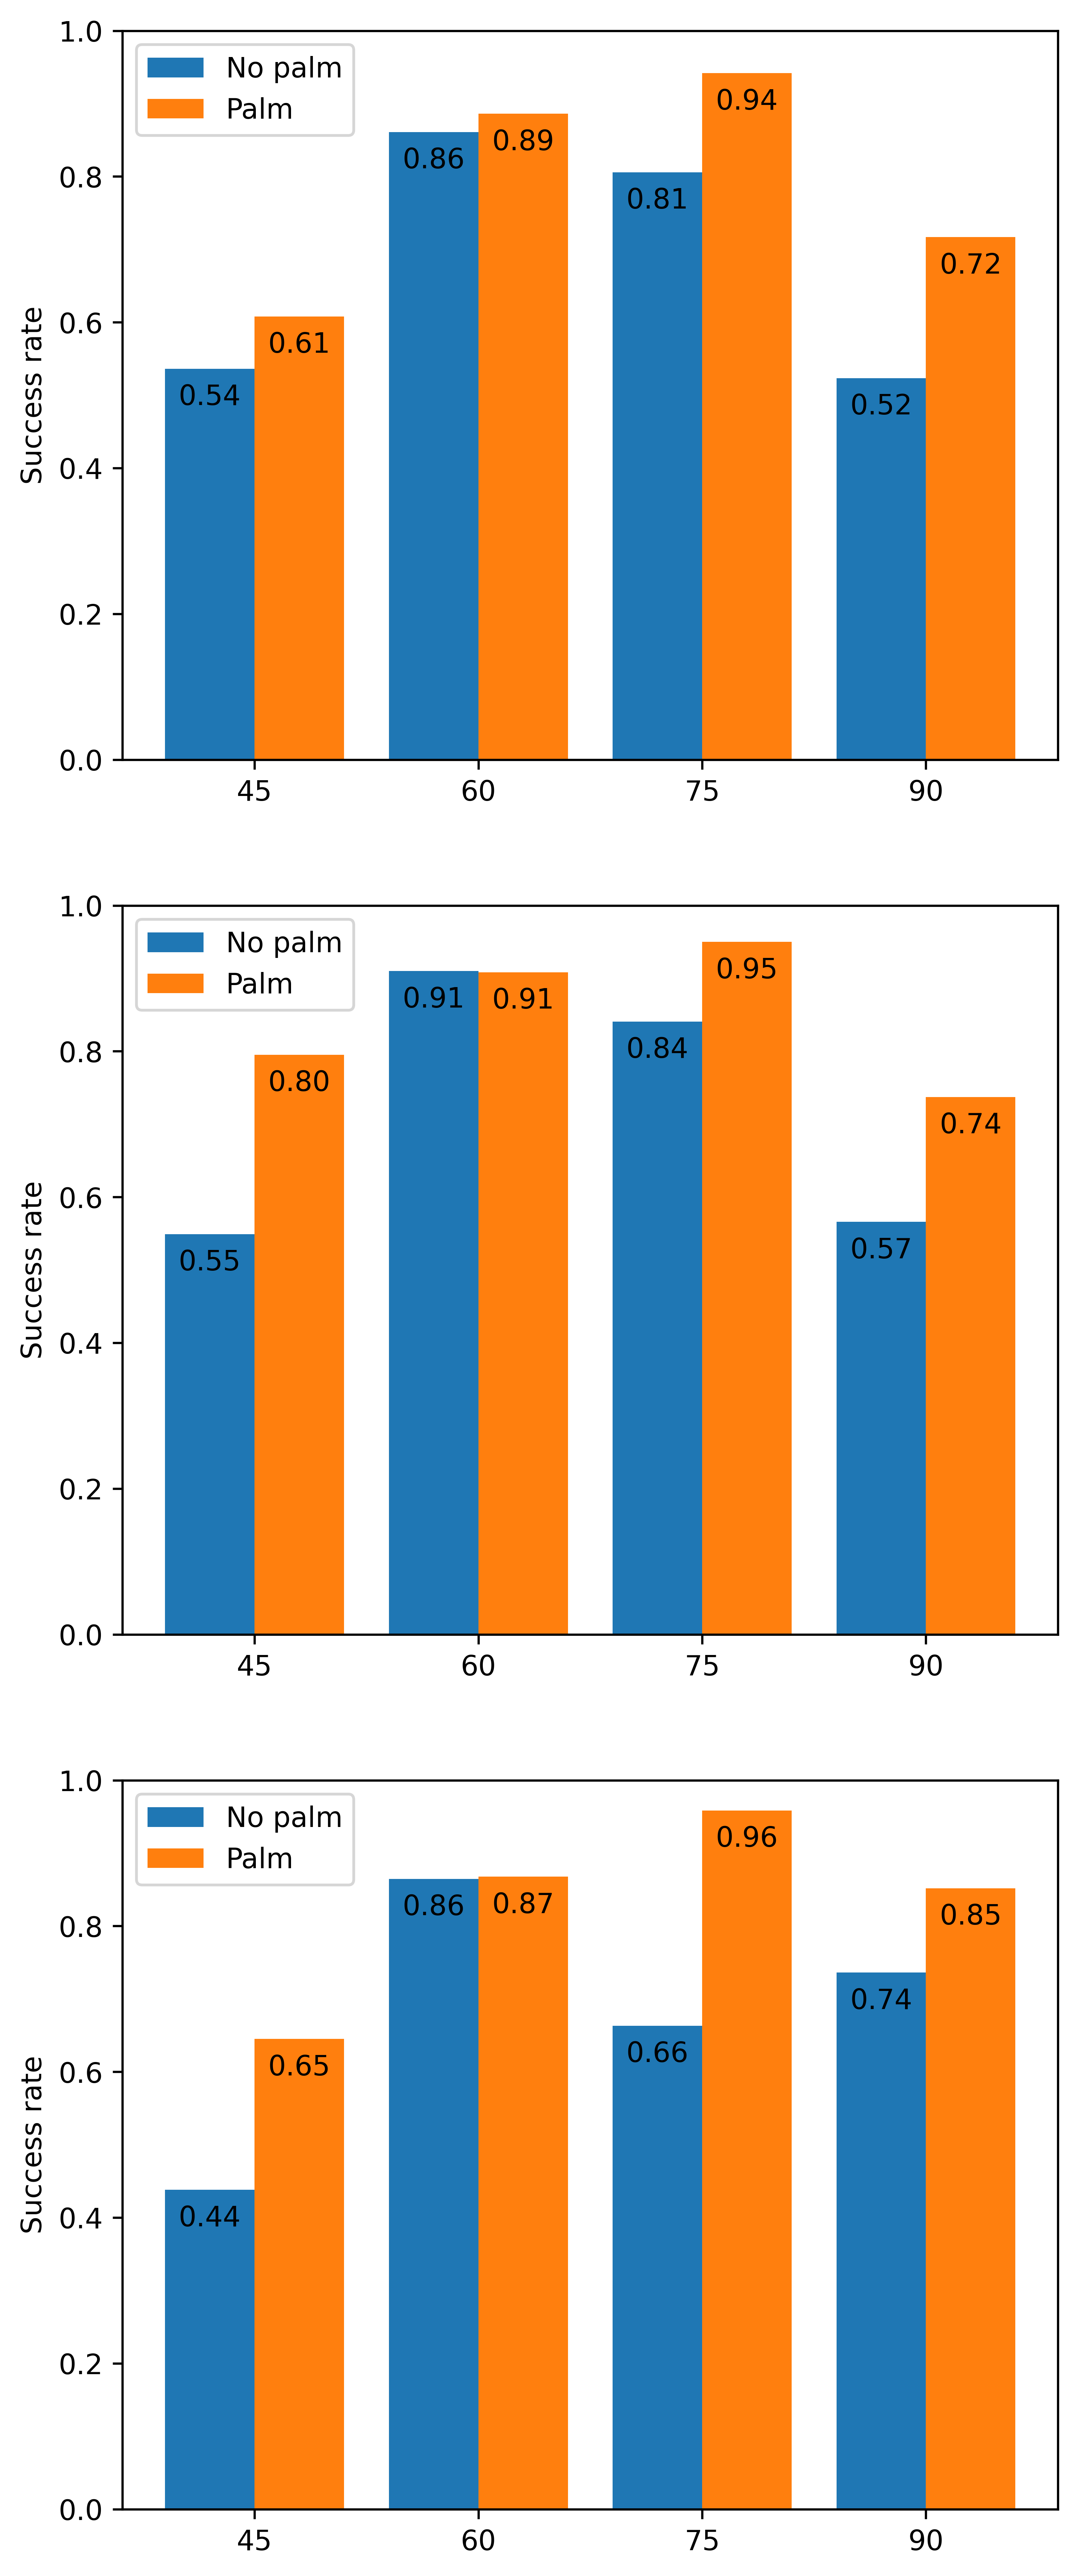

In [6]:
fig, axs = plt.subplots(3, 1, sharey=True)

angles = ["45", "60", "75", "90"]
label_locations = np.arange(len(angles))

for j in range(len(stiffnesses)):
  # for k in range(len(fingers)):
    # for i in range(len(palms)):

      width = 0.4
      multiplier = 0.5 # zero for odd bars, 0.5 for even

      # bar chart data
      rates = {
        "No palm" : (
            results[0][j][0].avg_SR_per_obj,
            results[0][j][1].avg_SR_per_obj,
            results[0][j][2].avg_SR_per_obj,
            results[0][j][3].avg_SR_per_obj,
        ),
        "Palm" : (
            results[1][j][0].avg_SR_per_obj,
            results[1][j][1].avg_SR_per_obj,
            results[1][j][2].avg_SR_per_obj,
            results[1][j][3].avg_SR_per_obj,
        ),
      }

      for attribute, measurement in rates.items():
        offset = width * multiplier
        rects = axs[j].bar(label_locations + offset, measurement, width, label=attribute)
        axs[j].bar_label(rects, padding=-15, fmt="%.2f")
        multiplier += 1

      # Add some text for labels, title and custom x-axis tick labels, etc.
      axs[j].set_ylabel("Success rate")
      # axs[j].set_title("Grasp success rate across finger stiffnesses")
      axs[j].set_xticks(label_locations + width, angles)
      axs[j].legend(loc="upper left", ncols=1)
      axs[j].set_ylim(0, 1.0)

fig.set_size_inches(6, 16)

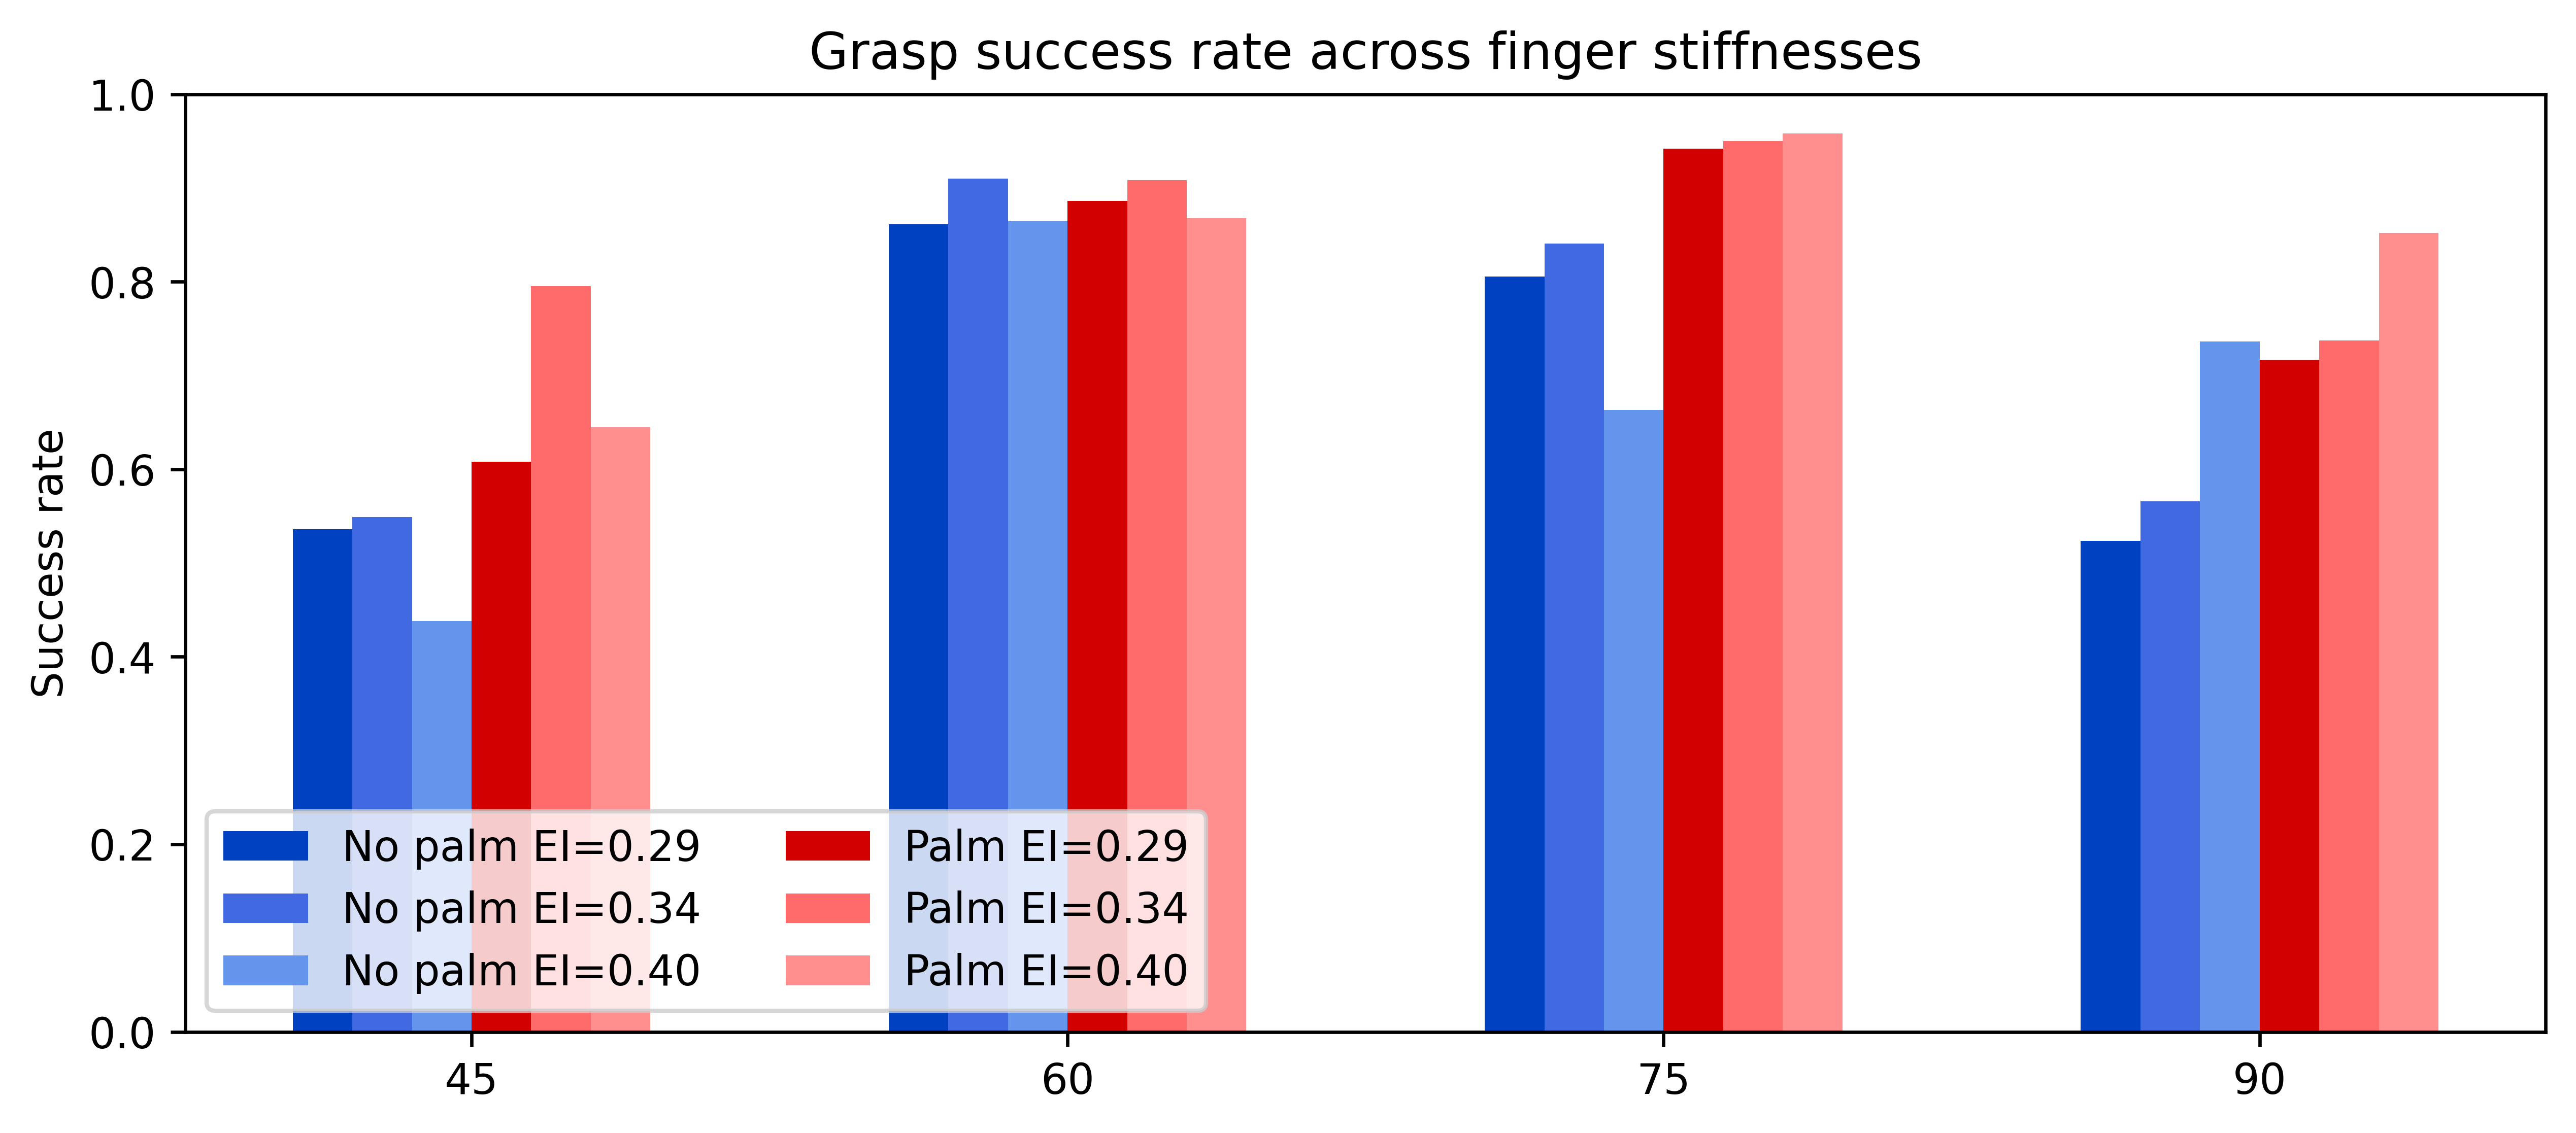

In [7]:
fig, axs = plt.subplots(1, 1, sharey=True)

angles = ["45", "60", "75", "90"]
label_locations = np.arange(len(angles))

# for j in range(len(stiffnesses)):
  # for k in range(len(fingers)):
    # for i in range(len(palms)):

colours = ["#0041C2", "#4169E1", "#6495ED",
           "#D30000", "#FF6B6B", "#ff8f8f"]

width = 0.1
multiplier = -1.5 # zero for odd bars, 0.5 for even

# bar chart data
rates = {
  "No palm EI=0.29" : (
      results[0][0][0].avg_SR_per_obj,
      results[0][0][1].avg_SR_per_obj,
      results[0][0][2].avg_SR_per_obj,
      results[0][0][3].avg_SR_per_obj,
  ),
  "No palm EI=0.34" : (
      results[0][1][0].avg_SR_per_obj,
      results[0][1][1].avg_SR_per_obj,
      results[0][1][2].avg_SR_per_obj,
      results[0][1][3].avg_SR_per_obj,
  ),
  "No palm EI=0.40" : (
      results[0][2][0].avg_SR_per_obj,
      results[0][2][1].avg_SR_per_obj,
      results[0][2][2].avg_SR_per_obj,
      results[0][2][3].avg_SR_per_obj,
  ),
  "Palm EI=0.29" : (
      results[1][0][0].avg_SR_per_obj,
      results[1][0][1].avg_SR_per_obj,
      results[1][0][2].avg_SR_per_obj,
      results[1][0][3].avg_SR_per_obj,
  ),
  "Palm EI=0.34" : (
      results[1][1][0].avg_SR_per_obj,
      results[1][1][1].avg_SR_per_obj,
      results[1][1][2].avg_SR_per_obj,
      results[1][1][3].avg_SR_per_obj,
  ),
  "Palm EI=0.40" : (
      results[1][2][0].avg_SR_per_obj,
      results[1][2][1].avg_SR_per_obj,
      results[1][2][2].avg_SR_per_obj,
      results[1][2][3].avg_SR_per_obj,
  ),
}

for ijk, (attribute, measurement) in enumerate(rates.items()):
  offset = width * multiplier
  rects = axs.bar(label_locations + offset, measurement, width, label=attribute, color=colours[ijk])
  # axs.bar_label(rects, padding=-15, fmt="%.2f")
  multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_ylabel("Success rate")
axs.set_title("Grasp success rate across finger stiffnesses")
axs.set_xticks(label_locations + width, angles)
axs.legend(loc="lower left", ncols=2)
axs.set_ylim(0, 1.0)

fig.set_size_inches(10, 4)

(array([0.53624339, 0.54920635, 0.43809524]), array([0.86111111, 0.90992063, 0.86468254]), array([0.80568783, 0.84087302, 0.66309524]), array([0.52354497, 0.56587302, 0.73611111]))
0.6912037037037037
(array([0.06975309, 0.01746032, 0.10679012, 0.08496473]), array([0.04135802, 0.03134921, 0.07098765, 0.12760141]))
(array([0.60806878, 0.7952381 , 0.6450334 ]), array([0.88611111, 0.90833333, 0.86759259]), array([0.94166667, 0.95      , 0.95833333]), array([0.71679894, 0.73730159, 0.85185185]))
0.8221941411892392
(array([0.07471131, 0.01975309, 0.00833333, 0.05185185]), array([0.112458  , 0.02098765, 0.00833333, 0.08320106]))


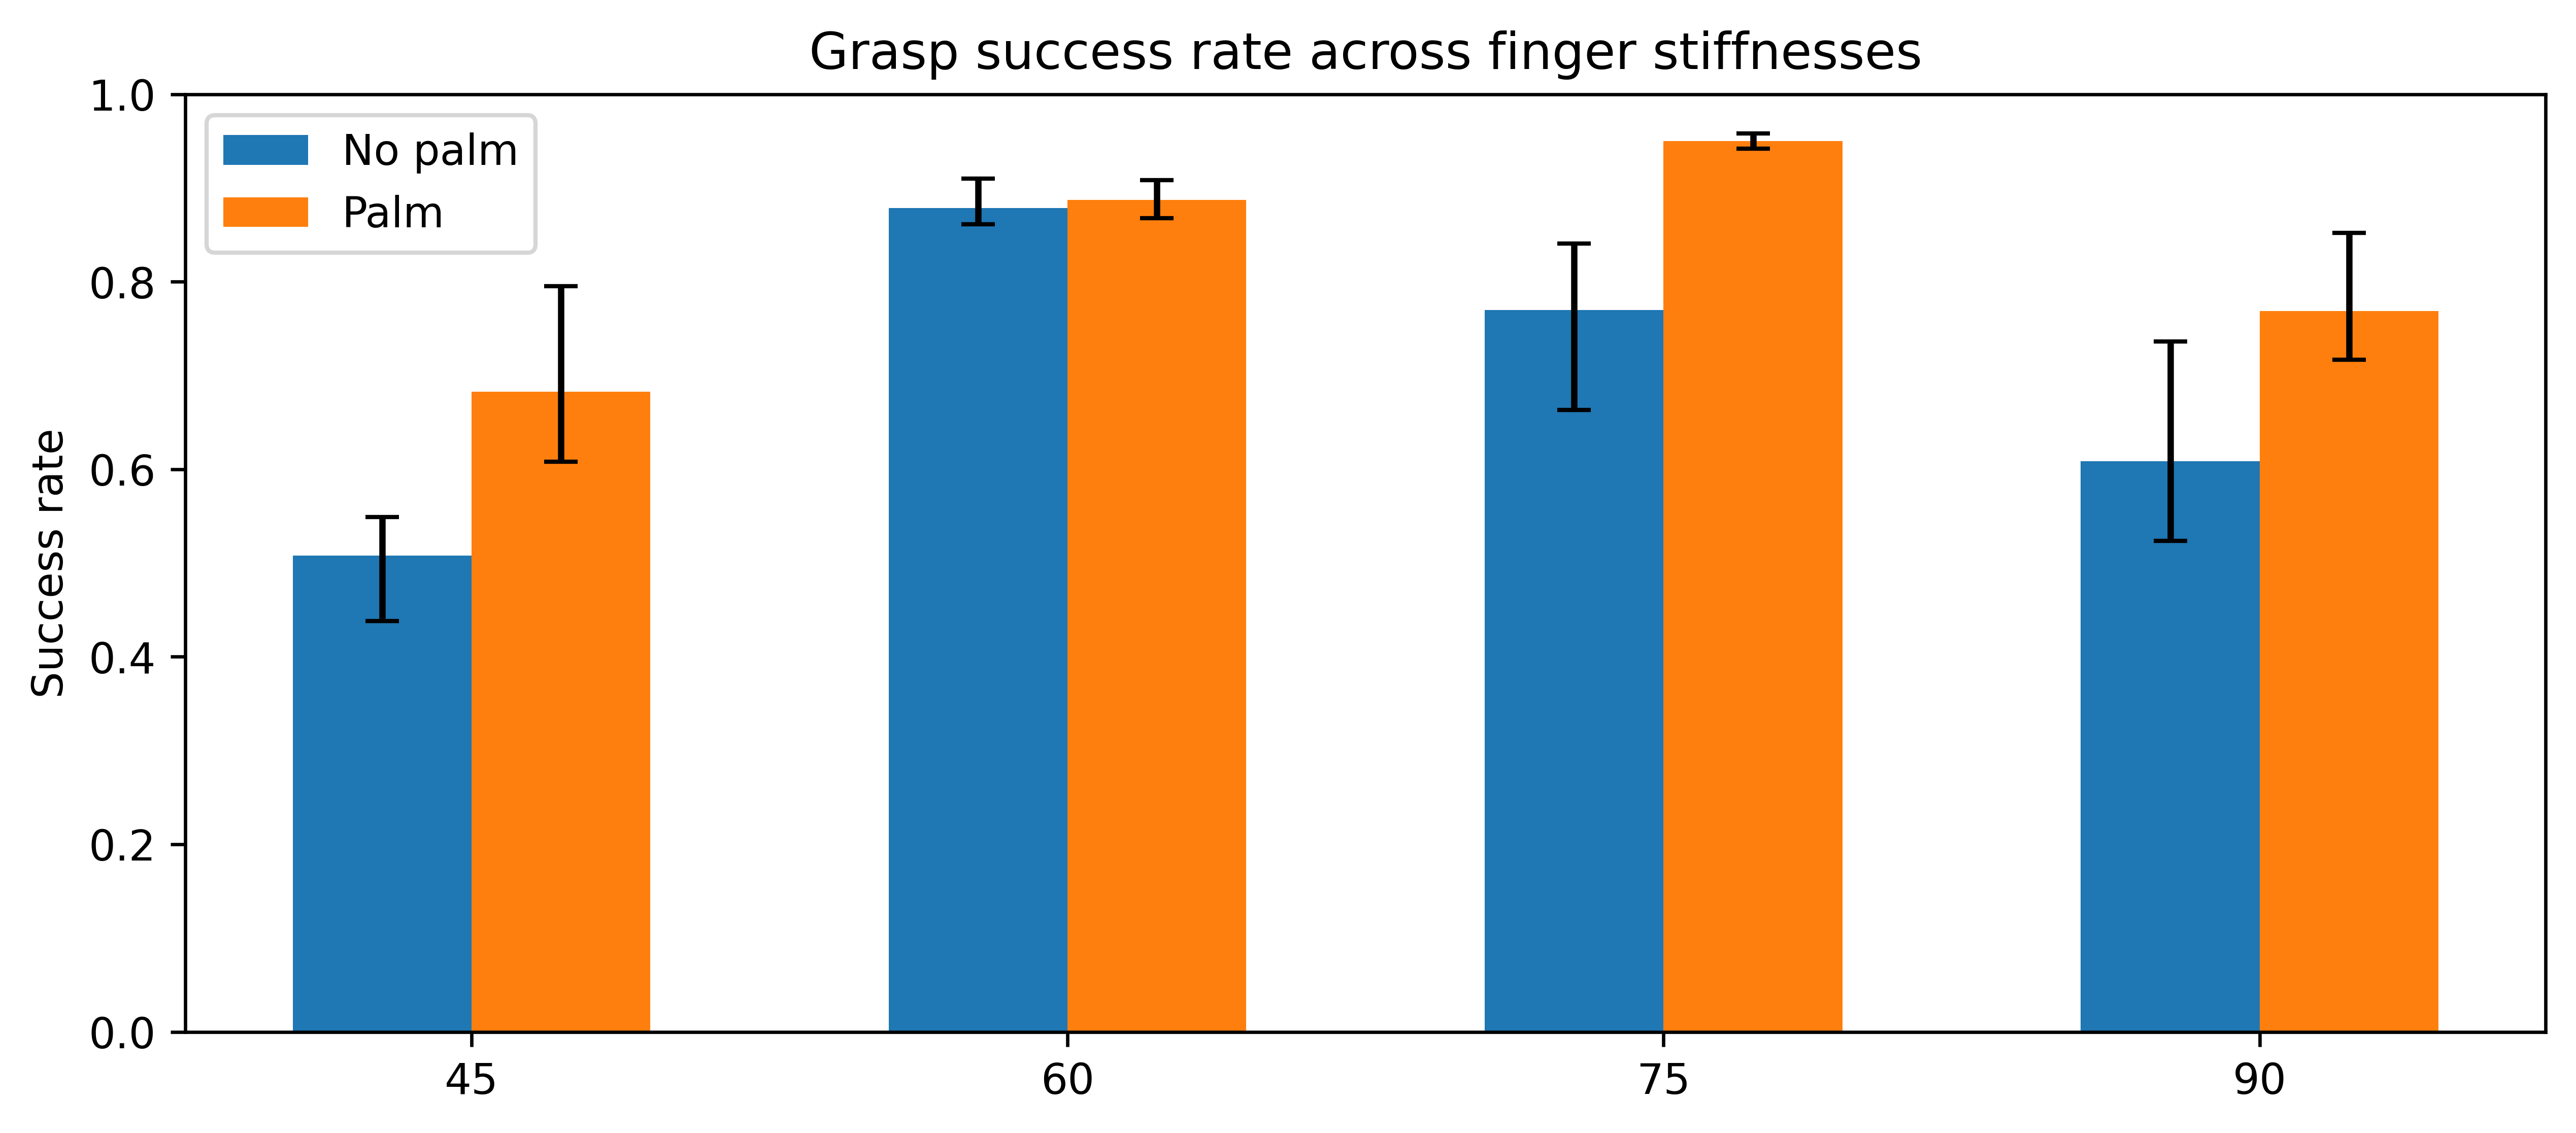

In [16]:
fig, axs = plt.subplots(1, 1, sharey=True)

angles = ["45", "60", "75", "90"]
label_locations = np.arange(len(angles))

# for j in range(len(stiffnesses)):
  # for k in range(len(fingers)):
    # for i in range(len(palms)):

colours = ["#0041C2", "#4169E1", "#6495ED",
           "#D30000", "#FF6B6B", "#ff8f8f"]

no_palm_45 = np.array([results[0][x][0].avg_SR_per_obj for x in range(3)])
no_palm_60 = np.array([results[0][x][1].avg_SR_per_obj for x in range(3)])
no_palm_75 = np.array([results[0][x][2].avg_SR_per_obj for x in range(3)])
no_palm_90 = np.array([results[0][x][3].avg_SR_per_obj for x in range(3)])
palm_45 = np.array([results[1][x][0].avg_SR_per_obj for x in range(3)])
palm_60 = np.array([results[1][x][1].avg_SR_per_obj for x in range(3)])
palm_75 = np.array([results[1][x][2].avg_SR_per_obj for x in range(3)])
palm_90 = np.array([results[1][x][3].avg_SR_per_obj for x in range(3)])

width = 0.3
multiplier = 0.5

# bar chart data
rates = {
  "No palm" : (
      no_palm_45,
      no_palm_60,
      no_palm_75,
      no_palm_90,
  ),
  "Palm" : (
      palm_45,
      palm_60,
      palm_75,
      palm_90,
  ),
}

for ijk, (attribute, measurement) in enumerate(rates.items()):
  avg = np.average(measurement, axis=1)
  print(measurement)
  print(np.average(measurement))
  yerr=(avg - np.min(measurement, axis=1), 
        np.max(measurement, axis=1) - avg)
  print(yerr)
  offset = width * multiplier
  rects = axs.bar(label_locations + offset, avg, width, label=attribute, yerr=yerr,
                  capsize=4)
  # axs.bar_label(rects, padding=-15, fmt="%.2f")
  multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_ylabel("Success rate")
axs.set_title("Grasp success rate across finger stiffnesses")
axs.set_xticks(label_locations + width, angles)
axs.legend(loc="upper left", ncols=1)
axs.set_ylim(0, 1.0)

fig.set_size_inches(10, 4)